# Kaj so nevronske mreže


# Nevron

$\Large o = \sum_{j=0}^{n}(i_j w_j) + b$

* $i_j$ je specifičen input
* $w_j$ je weight specifičnega inputa
* $b$   je bias nevrona

<hr>

![Nevron](images/01.PNG)

$o = \sum_{j=0}^{n}(i_j w_j) + b = i_0 \cdot w_0 + i_1 \cdot w_1 + i_2 \cdot w_2 + b = 1 \cdot 0.2 + 2 \cdot 0.8 + 3 \cdot (-0.5) + 2 = 2.3$

![Nevron - 4 inputs](images/02.PNG)

$o = \sum_{j=0}^{n}(i_j w_j) + b = i_0 \cdot w_0 + i_1 \cdot w_1 + i_2 \cdot w_2 + i_3 \cdot w_3 + b = 1 \cdot 0.2 + 2 \cdot 0.8 + 3 \cdot (-0.5) + 2.5 \cdot 1.0 + 2 = 4.8$

<hr>

**Dot product:**

$\Large \vec{a}^{\,}\cdot \vec{b}^{\,} = [1,2,3]\cdot [2,3,4] = 1\cdot 2 + 2\cdot 3 + 3\cdot 4 = 20$

# Plast nevronov


![Dense layer](images/03.PNG)

<hr>


![2 Dense layers](images/04.PNG)

<hr>

In [7]:
import numpy as np
np.random.seed(2020)


class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_neurons, n_inputs)
        print("Weights: ")
        print(self.weights)
        self.biases = np.zeros(n_neurons)
        print("Bias: ")
        print(self.biases)

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(self.weights, inputs) + self.biases

inputs = [1.0, 2.0, 3.0, 2.5]

print("Creating DENSE 1")
dense1 = Layer_Dense(4, 3)
print("Creating DENSE 2")
dense2 = Layer_Dense(3, 3)

dense1.forward(inputs)
dense2.forward(dense1.output)

print("Dense 1 output: ")
print(dense1.output)
print("Dense 2 outut: ")
print(dense2.output)

Creating DENSE 1
Weights: 
[[-0.01768846  0.00075552 -0.0113063  -0.0065143 ]
 [-0.00893116 -0.01274101 -0.00061154  0.00064514]
 [ 0.00410113 -0.00572882 -0.00801334  0.01312035]]
Bias: 
[0. 0. 0.]
Creating DENSE 2
Weights: 
[[ 0.01274699 -0.01214358  0.00313719]
 [-0.01444821 -0.00368961 -0.00769227]
 [ 0.00392616  0.00057294  0.02089979]]
Bias: 
[0. 0. 0.]
Dense 1 output: 
[-0.06638206 -0.03463496  0.00140435]
Dense 2 outut: 
[-0.00042117  0.00107609 -0.00025112]


<hr>

![Matrix calculation](images/05.PNG)

<hr>

In [10]:
import numpy as np
np.random.seed(2020)

class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        # <=== HERE ===>
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        # <=== HERE ===>
        print("Weights: ")
        print(self.weights)
        # <=== HERE ===>
        self.biases = np.zeros((1, n_neurons))
        # <=== HERE ===>
        print("Bias: ")
        print(self.biases)

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        # <=== HERE ===>
        self.output = np.dot(inputs, self.weights) + self.biases
        # <=== HERE ===>
        
inputs = np.array([[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]])
print("Inputs:")
print(inputs)

dense1 = Layer_Dense(4,3)
dense1.forward(inputs)

print("Dense OUTPUT")
print(dense1.output)

Inputs:
[[ 1.   2.   3.   2.5]
 [ 2.   5.  -1.   2. ]
 [-1.5  2.7  3.3 -0.8]]
Weights: 
[[-0.01768846  0.00075552 -0.0113063 ]
 [-0.0065143  -0.00893116 -0.01274101]
 [-0.00061154  0.00064514  0.00410113]
 [-0.00572882 -0.00801334  0.01312035]]
Bias: 
[[0. 0. 0.]]
Dense OUTPUT
[[-0.04687376 -0.03520472  0.00831595]
 [-0.07879453 -0.05981655 -0.06417807]
 [ 0.01150903 -0.01670778 -0.01440384]]


# Activation functions

![Activation function](images/06.PNG)

## Step Activation Function

$\Large 
y = 
\left\{
	\begin{array}{ll}
		1  & x > 0 \\
        0  & x \leq 0
	\end{array}
\right.
$

## Sigmoid Activation Function

$\Large y = \frac{1}{1+e^{-x}}$

## Rectified Linear Units - ReLU

$\Large 
y = 
\left\{
	\begin{array}{ll}
		x  & x > 0 \\
        0  & x \leq 0
	\end{array}
\right.
$

## Uporaba aktivacijske funkcije v naši neuronski merži

<hr>

Celotna koda:

In [17]:
import numpy as np
np.random.seed(2020)

class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        print("Weights: ")
        print(self.weights)
        self.biases = np.zeros((1, n_neurons))
        print("Bias: ")
        print(self.biases)

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# <=== HERE ===>
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output valzes from input
        self.output = np.maximum(0, inputs)
# <=== HERE ===>
        
        
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

print("Ustvarimo DENSE 1")
dense1 = Layer_Dense(4, 3)
# <=== HERE ===>
activation1 = Activation_ReLU()
# <=== HERE ===>
print("Ustvarimo DENSE 2")
dense2 = Layer_Dense(3, 3)

dense1.forward(inputs)
# <=== HERE ===>
activation1.forward(dense1.output)
# <=== HERE ===>
dense2.forward(activation1.output)

print()
print("Dense 1 output: ")
print(dense1.output)
# <=== HERE ===>
print("ReLU 1 output:")
print(activation1.output)
# <=== HERE ===>
print("Dense 2 output: ")
print(dense2.output)

Ustvarimo DENSE 1
Weights: 
[[-0.01768846  0.00075552 -0.0113063 ]
 [-0.0065143  -0.00893116 -0.01274101]
 [-0.00061154  0.00064514  0.00410113]
 [-0.00572882 -0.00801334  0.01312035]]
Bias: 
[[0. 0. 0.]]
Ustvarimo DENSE 2
Weights: 
[[ 0.01274699 -0.01214358  0.00313719]
 [-0.01444821 -0.00368961 -0.00769227]
 [ 0.00392616  0.00057294  0.02089979]]
Bias: 
[[0. 0. 0.]]

Dense 1 output: 
[[-0.04687376 -0.03520472  0.00831595]
 [-0.07879453 -0.05981655 -0.06417807]
 [ 0.01150903 -0.01670778 -0.01440384]]
ReLU 1 output:
[[0.         0.         0.00831595]
 [0.         0.         0.        ]
 [0.01150903 0.         0.        ]]
Dense 2 output: 
[[ 3.26497657e-05  4.76452766e-06  1.73801632e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.46705536e-04 -1.39760839e-04  3.61060755e-05]]


## Classification dataset

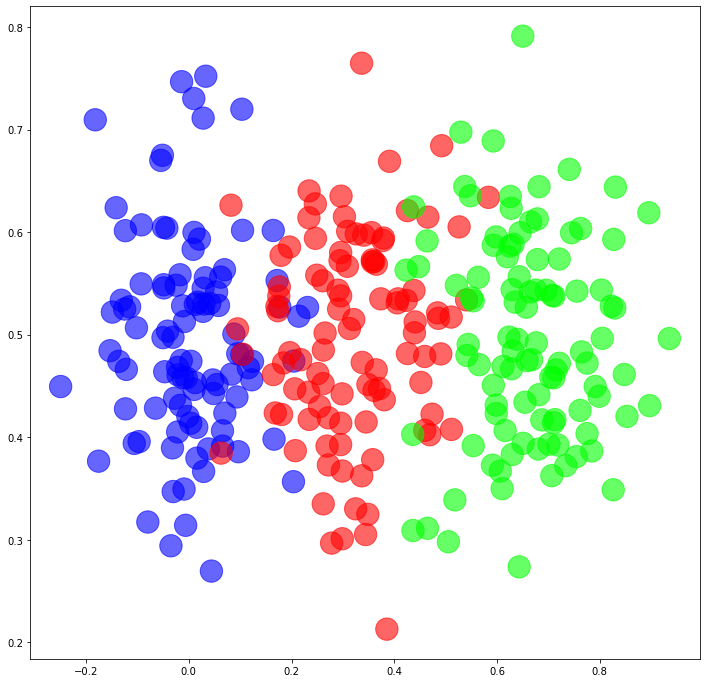

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def vertical_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        X[ix] = np.c_[np.random.randn(samples)*.1 + (class_number)/3, np.random.randn(samples)*.1 + 0.5]
        y[ix] = class_number
        
    return X, y

X, y = vertical_data(samples=100, classes=3)

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
plt.show()

## Softmax Activation Function



$\Large S_j = \frac{e^{o_j}}{\sum_{l=0}^{L}e^{o_l}}$

* $S_j$ je confidence score $j$ razreda
* $o_j$ je izhodna vrednost neurona
* $\sum_{l=0}^{L}e^{o_l}$ je seštevek $e^o$ vseh izhodnih vrednosti neuronov

<hr>

In [22]:
import numpy as np
np.random.seed(2020)

# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

# <=== HERE ===>
# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
# <=== HERE ===>      
        
# <=== HERE ===>
X, y = vertical_data(samples=100, classes=3)
# <=== HERE ===>

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
# <=== HERE ===>
activation2 = Activation_Softmax()
# <=== HERE ===>

# <=== HERE ===>
dense1.forward(X[:5])
# <=== HERE ===>
activation1.forward(dense1.output)
dense2.forward(activation1.output)
# <=== HERE ===>
activation2.forward(dense2.output)
# <=== HERE ===>

print("Dense 1 output: ")
print(dense1.output)
print("ReLU 1 output:")
print(activation1.output)
print("Dense 2 outut: ")
print(dense2.output)
# <=== HERE ===>
print("Softmax output - PREDICTION")
print(activation2.output)
# <=== HERE ===>

Dense 1 output: 
[[ 0.00029356  0.00378404 -0.00761929]
 [ 0.0013401   0.00344398 -0.00409113]
 [ 0.00058695  0.00348314 -0.006174  ]
 [ 0.00103049  0.00385227 -0.00581772]
 [ 0.0010549   0.00432745 -0.00680751]]
ReLU 1 output:
[[0.00029356 0.00378404 0.        ]
 [0.0013401  0.00344398 0.        ]
 [0.00058695 0.00348314 0.        ]
 [0.00103049 0.00385227 0.        ]
 [0.0010549  0.00432745 0.        ]]
Dense 2 outut: 
[[-7.09496948e-05 -4.68469341e-05  2.76271632e-05]
 [-5.99167243e-05 -3.79621801e-05  2.47480826e-05]
 [-6.39330692e-05 -4.17416733e-05  2.53132839e-05]
 [-6.90534754e-05 -4.45039336e-05  2.78550943e-05]
 [-7.80169708e-05 -5.04409554e-05  3.13289484e-05]]
Softmax output - PREDICTION
[[0.3333197  0.33332774 0.33335256]
 [0.33332149 0.3333288  0.33334971]
 [0.33332095 0.33332835 0.3333507 ]
 [0.33331984 0.33332802 0.33335214]
 [0.33331812 0.33332731 0.33335457]]


# Loss Function and Accuracy

## Categorical Cross-Entropy Loss

$\Large L = - \sum_{j}y_j log(\hat{y_j})$

* $L$ je **loss** vrednost
* $y_j$ je resnična vrednost
* $\hat{y_j}$ je napovedana vrednost

<hr>

$\Large L = - \sum_{j}y_j log(\hat{y_j}) = \\ 
\Large -( y_0 log(\hat{y_0}) + y_1 log(\hat{y_1}) + y_2 log(\hat{y_2})) = \\ 
\Large -(1 \cdot log(\hat{y_0}) + 0 \cdot log(\hat{y_1}) + 0 \cdot log(\hat{y_2})) = \\
\Large - log(\hat{y_0}) = - log(\hat{y_k})$

* $k$ - index pravilnega razreda

<hr>

<hr>

In [40]:
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

# <=== HERE ===>
# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
# <=== HERE ===>

        

X, y = vertical_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# <=== HERE ===>
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# <=== HERE ===>

# <=== HERE ===>
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# <=== HERE ===>


# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)


# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# <=== HERE ===>
# Let's see output of the first few samples:
print("Predictions")
print(activation2.output[:5])

# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value
print('loss:', loss)
# <=== HERE ===>

Predictions
[[0.33333592 0.33333506 0.33332902]
 [0.333335   0.3333354  0.3333296 ]
 [0.33333435 0.33333587 0.33332977]
 [0.33333823 0.3333366  0.33332518]
 [0.3333338  0.33333566 0.33333055]]
loss: 1.098616755173688


<hr>

[[0.3333197  0.33332774 0.33335256]
 [0.33332149 0.3333288  0.33334971]
 [0.33332095 0.33332835 0.3333507 ]
 [0.33331984 0.33332802 0.33335214]
 [0.33331812 0.33332731 0.33335457]]
loss: 1.0986002071329923
Accuracy:  0.3333333333333333


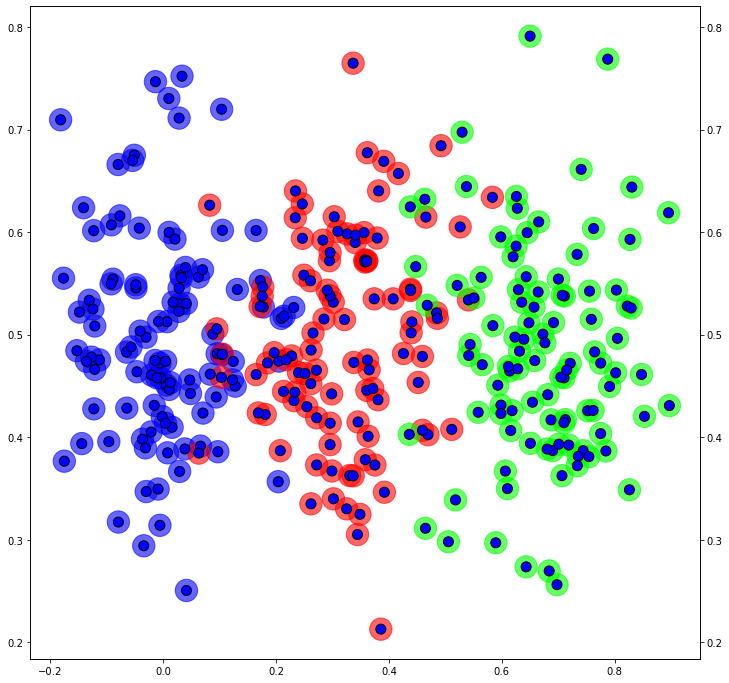

In [42]:
np.random.seed(2020)
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


        

X, y = vertical_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)


# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# Let's see output of the first few samples:
print(activation2.output[:5])

# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value
print('loss:', loss)


# <=== HERE ===>

predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions==y)
print("Accuracy: ", accuracy)

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()
# <=== HERE ===>

# Optimizing


## Random search

In [43]:
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


        
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()


# <=== HERE ===>
# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(2_000):

    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through loss function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
# <=== HERE ===>

New set of weights found, iteration: 0 loss: 1.099172486144514 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0990338213337882 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.0990083723738544 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 1.0988482828809323 acc: 0.3333333333333333
New set of weights found, iteration: 12 loss: 1.0984070984745369 acc: 0.3333333333333333
New set of weights found, iteration: 36 loss: 1.0982094303484753 acc: 0.3333333333333333
New set of weights found, iteration: 99 loss: 1.0973608354466369 acc: 0.3333333333333333
New set of weights found, iteration: 116 loss: 1.0973599711172715 acc: 0.3333333333333333
New set of weights found, iteration: 132 loss: 1.0972807043800246 acc: 0.3333333333333333
New set of weights found, iteration: 162 loss: 1.0966462939787796 acc: 0.3333333333333333
New set of weights found, iteration: 741 loss: 1.0960786003326586 acc: 0.3333333333333333


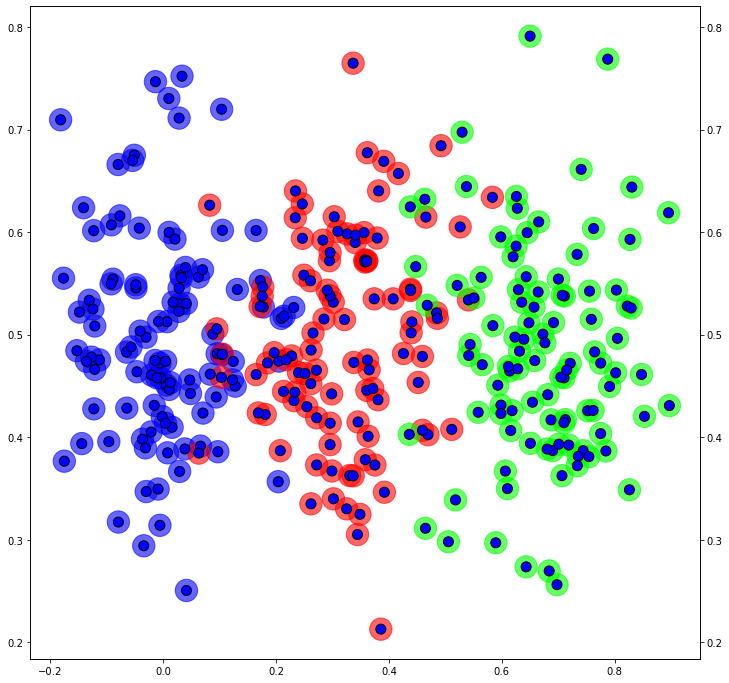

In [44]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

## Fraction Change


In [45]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


        
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()


# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(2_000):
    # <=== HERE ===>
    # Generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    # <=== HERE ===>

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()


New set of weights found, iteration: 0 loss: 1.0991206973804875 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0989454830179595 acc: 0.3333333333333333
New set of weights found, iteration: 12 loss: 1.098630053945509 acc: 0.3333333333333333
New set of weights found, iteration: 13 loss: 1.0984986987184229 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0963598574161162 acc: 0.3333333333333333
New set of weights found, iteration: 18 loss: 1.0939011228652415 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0923727159291765 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0919633163978937 acc: 0.3333333333333333
New set of weights found, iteration: 24 loss: 1.089064427319415 acc: 0.3333333333333333
New set of weights found, iteration: 28 loss: 1.0887023458364031 acc: 0.3333333333333333
New set of weights found, iteration: 29 loss: 1.088507806243374 acc: 0.3333333333333333
New set of weights found, 

New set of weights found, iteration: 546 loss: 0.3187738839122582 acc: 0.9066666666666666
New set of weights found, iteration: 555 loss: 0.31853919867879127 acc: 0.9133333333333333
New set of weights found, iteration: 562 loss: 0.3143341115285991 acc: 0.9166666666666666
New set of weights found, iteration: 565 loss: 0.30885280159881934 acc: 0.91
New set of weights found, iteration: 568 loss: 0.30863038830760436 acc: 0.9066666666666666
New set of weights found, iteration: 573 loss: 0.3052235612459253 acc: 0.9166666666666666
New set of weights found, iteration: 586 loss: 0.3011608205784045 acc: 0.9166666666666666
New set of weights found, iteration: 593 loss: 0.299895503291623 acc: 0.92
New set of weights found, iteration: 610 loss: 0.29930232121389516 acc: 0.9166666666666666
New set of weights found, iteration: 612 loss: 0.2971081461241559 acc: 0.9133333333333333
New set of weights found, iteration: 614 loss: 0.2962929296963057 acc: 0.9133333333333333
New set of weights found, iteration

New set of weights found, iteration: 1424 loss: 0.18926095112492297 acc: 0.9266666666666666
New set of weights found, iteration: 1438 loss: 0.18877676628046686 acc: 0.9233333333333333
New set of weights found, iteration: 1449 loss: 0.18832771667898518 acc: 0.93
New set of weights found, iteration: 1479 loss: 0.18798272486374018 acc: 0.93
New set of weights found, iteration: 1483 loss: 0.18797776634946858 acc: 0.93
New set of weights found, iteration: 1485 loss: 0.1874800025583652 acc: 0.93
New set of weights found, iteration: 1490 loss: 0.18685007229594844 acc: 0.9233333333333333
New set of weights found, iteration: 1550 loss: 0.18638722318781495 acc: 0.9266666666666666
New set of weights found, iteration: 1644 loss: 0.18629576677087523 acc: 0.93
New set of weights found, iteration: 1735 loss: 0.18627330299036407 acc: 0.93
New set of weights found, iteration: 1797 loss: 0.18585067313316936 acc: 0.93
New set of weights found, iteration: 1804 loss: 0.18579177845614553 acc: 0.93
New set o

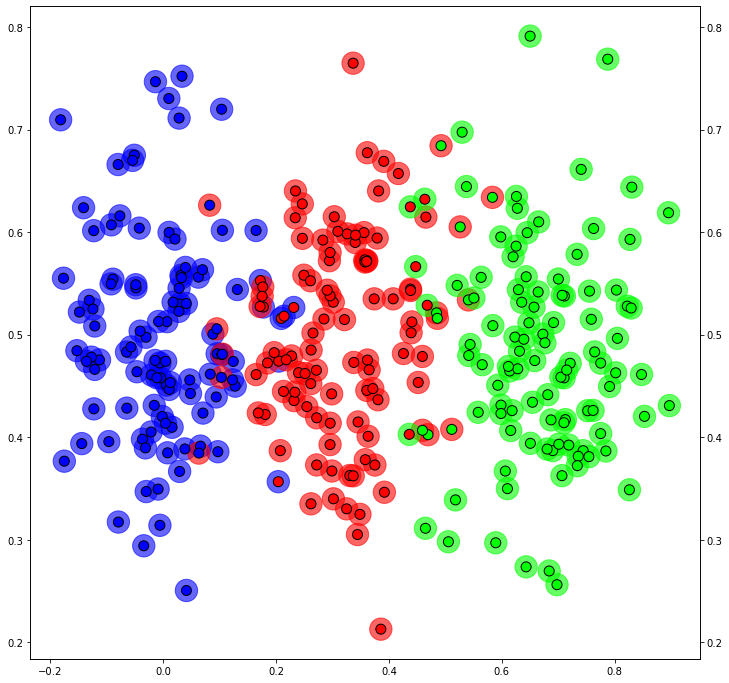

In [46]:
# To je za TRAINING VALIDATION

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

<hr>

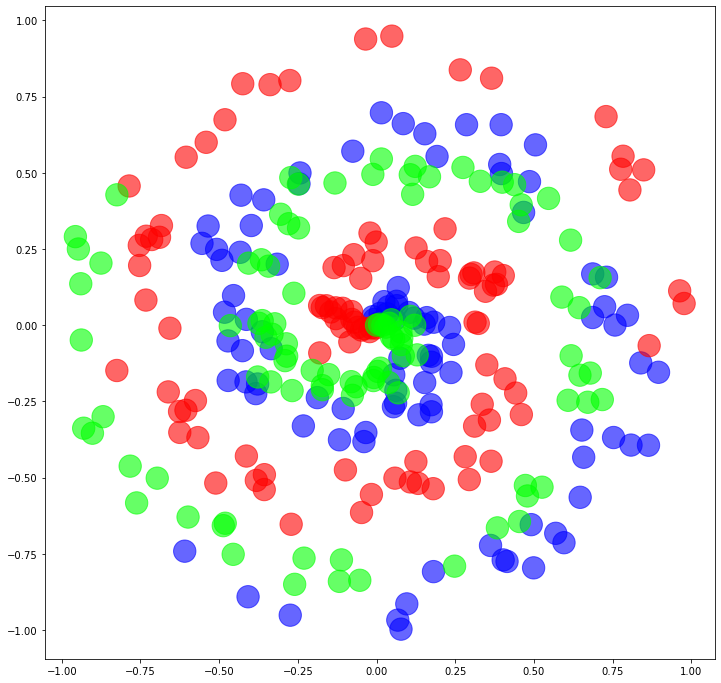

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Copyright (c) 2015 Andrej Karpathy
# License: https://github.com/cs231n/cs231n.github.io/blob/master/LICENSE
# Source: https://cs231n.github.io/neural-networks-case-study/
def spiral_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        r = np.linspace(0.0, 1, samples)
        t = np.linspace(class_number*4, (class_number+1)*4, samples) + np.random.randn(samples)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X, y = spiral_data(100, 3)

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


# <=== HERE ===>       
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# <=== HERE ===>


# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()


# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(2_000):

    # Generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.101776255582696 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0987228052068028 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.098486682986459 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0984008968027252 acc: 0.37333333333333335
New set of weights found, iteration: 18 loss: 1.098037008036807 acc: 0.32666666666666666
New set of weights found, iteration: 19 loss: 1.0979495541803606 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0977012521975935 acc: 0.35
New set of weights found, iteration: 25 loss: 1.097541461925107 acc: 0.3433333333333333
New set of weights found, iteration: 26 loss: 1.0972445892769975 acc: 0.36333333333333334
New set of weights found, iteration: 37 loss: 1.096695052563302 acc: 0.4
New set of weights found, iteration: 44 loss: 1.096242626276354 acc: 0.37
New set of weights found, iteration: 45 loss: 1.0960130084109532 acc: 0

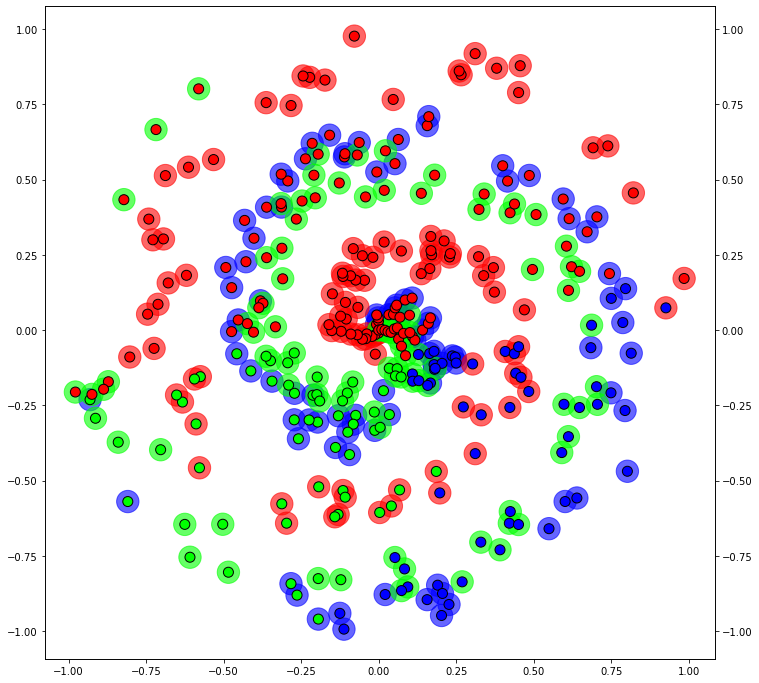

In [52]:
# To je za TRAINING VALIDATION
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

# Partial derivatieves

## Partial derivative for 1 neuron


![Partial derivatives of 1 neuron](images/07.PNG)



$
\Large output = ReLU(z) =  
\left\{
	\begin{array}{ll}
		z  & z > 0 \\
        0  & z \leq 0
	\end{array}
\right.
\\
\Large z = w_0 \cdot i_0 + w_1 \cdot i_1 + w_2 \cdot i_2 + b \\
$
<hr>

$
\Large d\_value \cdot \frac{dReLU}{dz} \cdot \frac{\partial z}{\partial p_j}
$

* $d\_value$ predstavlja vrednost, kako močno je ta neuron vplival na naslednjo plast
* $p_j$ predstavlja parameter katerega vpliv iščemo. Lahko je to specifičnna weight oziroma bias, lahko pa je tudi input

![d_value](images/08.PNG)

<hr>

Parcialni odvod ReLu:

$\Large \frac{dReLU}{dz} =
\left\{
	\begin{array}{ll}
		\frac{d}{dz}z  & z > 0 \\
        \frac{d}{dz}0  & z \leq 0
	\end{array}
\right.
= \left\{
	\begin{array}{ll}
		1  & z > 0 \\
        0  & z \leq 0
	\end{array}
\right.
$

![dReLU_dz](images/09.PNG)

<hr>

Parcialni odvod uteži:

$\Large \frac{\partial z}{\partial w_j} = \frac{\partial}{\partial w_j} \cdot w_j i_j + \frac{\partial}{\partial w_j} w_{j+1} i_{j+1} + \frac{\partial}{\partial w_j} w_{j+2} i_{j+2} + \frac{\partial}{\partial w_j} b = i_j + 0 + 0 + 0 = i_j $

![dsum_dw](images/10.PNG)

<hr>

Pacrialni odvod bias-a:

$\Large \frac{\partial z}{\partial b} = \frac{\partial}{\partial b} \cdot w_j i_j + \frac{\partial}{\partial b} w_{j+1} i_{j+1} + \frac{\partial}{\partial b} w_{j+2} i_{j+2} + \frac{\partial}{\partial b} b = 0 + 0 + 0 + 1 = 1 $

![dsum_db](images/11.PNG)

<hr>

Parcialni odvod inputa:

$\Large \frac{\partial z}{\partial i_j} = \frac{\partial}{\partial i_j} \cdot w_j i_j + \frac{\partial}{\partial i_j} w_{j+1} i_{j+1} + \frac{\partial}{\partial i_j} w_{j+2} i_{j+2} + \frac{\partial}{\partial i_j} b = w_j + 0 + 0 + 0 = w_j $

![dsum_i](images/12.PNG)

<hr>

$ p_j = p_j + (-l_r \cdot dp_j) $

* $p_j$ je naš parameter katerega želimo posodobiti. Weights oziroma bias
* $l_r$ je **learning rate**
* $dp_j$ je vrednost parcialnega odvoda

<hr>

In [60]:
import numpy as np
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

        
    # <=== HERE ===>
    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)
    # <=== HERE ===>


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # <=== HERE ===>
    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0
    # <=== HERE ===>

        
        
inputs = np.array([[1.0, 2.0, 3.0, 2.5],
                  [1.0, 2.0, 3.0, 2.5],
                  [1.0, 2.0, 3.0, 2.5]])

dense1 = Layer_Dense(4, 3)
print("Dense 1 weights: ")
print(dense1.weights)
print("Dense 1 biases")
print(dense1.biases)
activation1 = Activation_ReLU()

dense1.forward(inputs)
print("Dense 1 forward")
print(dense1.output)
activation1.forward(dense1.output)
print("ReLU 1 output:")
print(activation1.output)

# <=== HERE ===>
# d_values passed from next layer back to this layer
d_values = np.array([[1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0]])

activation1.backward(d_values)
print("Activation 1 dinputs")
print(activation1.dinputs)
dense1.backward(activation1.dinputs)
print("Dense 1 dweights")
print(dense1.dweights)
print("Dense 1 dbias")
print(dense1.dbiases)
print("Dense 1 dinputs")
print(dense1.dinputs)
# <=== HERE ===>

Dense 1 weights: 
[[-0.01768846  0.00075552 -0.0113063 ]
 [-0.0065143  -0.00893116 -0.01274101]
 [-0.00061154  0.00064514  0.00410113]
 [-0.00572882 -0.00801334  0.01312035]]
Dense 1 biases
[[0. 0. 0.]]
Dense 1 forward
[[-0.04687376 -0.03520472  0.00831595]
 [-0.04687376 -0.03520472  0.00831595]
 [-0.04687376 -0.03520472  0.00831595]]
ReLU 1 output:
[[0.         0.         0.00831595]
 [0.         0.         0.00831595]
 [0.         0.         0.00831595]]
Activation 1 dinputs
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Dense 1 dweights
[[0.  0.  3. ]
 [0.  0.  6. ]
 [0.  0.  9. ]
 [0.  0.  7.5]]
Dense 1 dbias
[[0. 0. 3.]]
Dense 1 dinputs
[[-0.0113063  -0.01274101  0.00410113  0.01312035]
 [-0.0113063  -0.01274101  0.00410113  0.01312035]
 [-0.0113063  -0.01274101  0.00410113  0.01312035]]


# Odvodi Loss FunctionS in Softmax layer


$\Large \frac{\partial L}{\partial z_k} = \hat{y_k} - y_k $

* $L$ predstavlja categorical crossentropy loss funkcijo
* $\hat{y_k}$ predstavlja napovedano vrednost
* $y_k$ predstavlja realno vrednost


In [61]:
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities



# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods



# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    
    # <=== HERE ===>
    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples
    # <=== HERE ===>


# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)
# Let's see output of the first few samples:
print(loss_activation.output[:5])

# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
print("Partial derivatives")
print("Dense 1: dweights")
print(dense1.dweights)
print("Dense 1: dbiases")
print(dense1.dbiases)
print("Dense 2: dweights")
print(dense2.dweights)
print("Dense 2: dbiases")
print(dense2.dbiases)

[[0.33333333 0.33333333 0.33333333]
 [0.33333329 0.33333349 0.33333321]
 [0.33333337 0.33333306 0.33333356]
 [0.33333324 0.33333369 0.33333307]
 [0.3333334  0.33333291 0.3333337 ]]
loss: 1.098612979464715
acc: 0.36
Partial derivatives
Dense 1: dweights
[[ 6.32785072e-06 -1.67157857e-05 -6.78635455e-05]
 [-1.70771268e-04  1.36645973e-04 -2.23167263e-04]]
Dense 1: dbiases
[[-2.11037594e-04 -5.71635826e-06 -3.98783662e-04]]
Dense 2: dweights
[[ 1.46060426e-04 -1.90209366e-07 -1.45870217e-04]
 [-4.00333370e-05 -1.28032481e-04  1.68065818e-04]
 [ 4.01205065e-05 -7.51643258e-05  3.50438193e-05]]
Dense 2: dbiases
[[-1.21279560e-06  2.10014893e-06 -8.87353336e-07]]


# Optimizers


## Stochastic Gradient Descent (SGD) Optimizer

Za začetek si bomo pogledali splošni SGD Optimizer. Pri tem parametre posodobimo tako, da jim odštejemo majhen del njihove vrednosti odvoda.

$\Large p_i = p_i - l_r \cdot d\_p_i$

* $p_i$ je parameter katerega želimo posodobiti. Weights oziroma bias
* $l_r$ je **learning rate**, ki nadzira kako velike posodobitve parametrev naredimo z enim korakom učenja
* $d\_p_i$ je parcialni odvod loss funkcije glede na parameter $p_i$

<hr>

In [64]:
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

# <=== HERE ===>
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases
# <=== HERE ===>
        
        
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# <=== HERE ===>
# Create optimizer
optimizer = Optimizer_SGD()
# <=== HERE ===>



# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)
# Let's see output of the first few samples:
print(loss_activation.output[:5])

# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
#print(dense1.dweights)
#print(dense1.dbiases)
#print(dense2.dweights)
#print(dense2.dbiases)

# <=== HERE ===>
# Update weights and biases
optimizer.update_params(dense1)
optimizer.update_params(dense2)



# And if we make anothe forward pass with same data we should have lowered the loss


# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)
# Let's see output of the first few samples:
print(loss_activation.output[:5])

# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)
# <=== HERE ===>

[[0.33333333 0.33333333 0.33333333]
 [0.33333336 0.33333325 0.3333334 ]
 [0.3333334  0.33333308 0.33333352]
 [0.33333342 0.33333302 0.33333356]
 [0.33333328 0.33333343 0.33333329]]
loss: 1.098620899645947
acc: 0.31
[[0.33333609 0.33332903 0.33333488]
 [0.33333609 0.33332903 0.33333488]
 [0.33333609 0.33332903 0.33333488]
 [0.33333609 0.33332903 0.33333488]
 [0.33333609 0.33332903 0.33333488]]
loss: 1.0986190941602874
acc: 0.2966666666666667


<hr>

# Training in epochos

In [65]:
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


        
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases


# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD()



# <=== HERE ===>
# Train in loop
for epoch in range(10001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.5f}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
# <=== HERE ===>

epoch: 0, acc: 0.303, loss: 1.09861
epoch: 100, acc: 0.407, loss: 1.09230
epoch: 200, acc: 0.413, loss: 1.07876
epoch: 300, acc: 0.390, loss: 1.07696
epoch: 400, acc: 0.393, loss: 1.07566
epoch: 500, acc: 0.397, loss: 1.07516
epoch: 600, acc: 0.390, loss: 1.07498
epoch: 700, acc: 0.387, loss: 1.07494
epoch: 800, acc: 0.387, loss: 1.07493
epoch: 900, acc: 0.390, loss: 1.07493
epoch: 1000, acc: 0.390, loss: 1.07492
epoch: 1100, acc: 0.393, loss: 1.07492
epoch: 1200, acc: 0.397, loss: 1.07492
epoch: 1300, acc: 0.393, loss: 1.07492
epoch: 1400, acc: 0.390, loss: 1.07492
epoch: 1500, acc: 0.397, loss: 1.07492
epoch: 1600, acc: 0.397, loss: 1.07492
epoch: 1700, acc: 0.393, loss: 1.07493
epoch: 1800, acc: 0.390, loss: 1.07492
epoch: 1900, acc: 0.397, loss: 1.07492
epoch: 2000, acc: 0.390, loss: 1.07493
epoch: 2100, acc: 0.397, loss: 1.07492
epoch: 2200, acc: 0.397, loss: 1.07492
epoch: 2300, acc: 0.397, loss: 1.07492
epoch: 2400, acc: 0.393, loss: 1.07492
epoch: 2500, acc: 0.393, loss: 1.0749

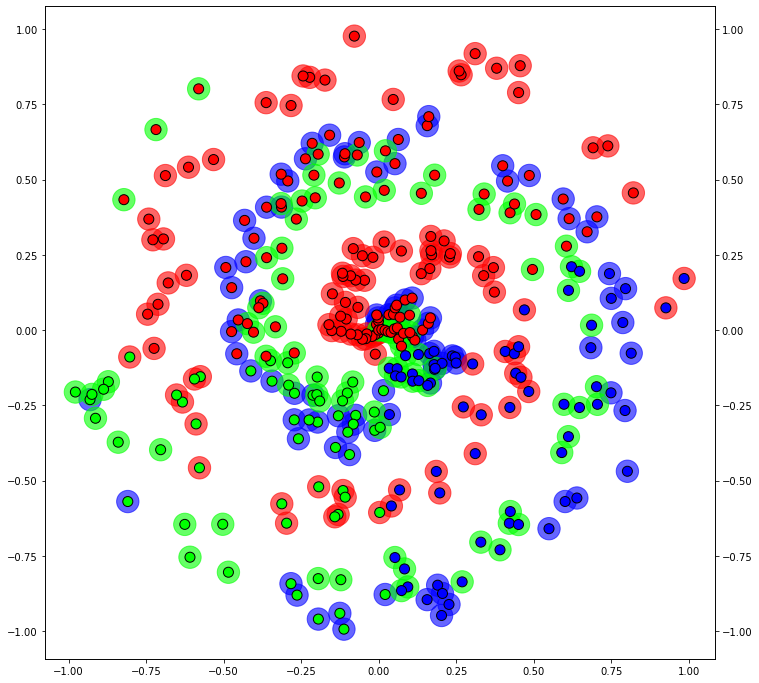

In [66]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)

            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


        
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases


X, y = spiral_data(samples=100, classes=3)



# <=== HERE ===>
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 128)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()


# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(128, 3)
# <=== HERE ===>



# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()


# <=== HERE ===>
# Create optimizer
optimizer = Optimizer_SGD(learning_rate=0.85)
# <=== HERE ===>


# Train in loop
for epoch in range(10001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.343, loss: 1.099
epoch: 100, acc: 0.407, loss: 1.083
epoch: 200, acc: 0.447, loss: 1.072
epoch: 300, acc: 0.430, loss: 1.070
epoch: 400, acc: 0.430, loss: 1.069
epoch: 500, acc: 0.423, loss: 1.068
epoch: 600, acc: 0.417, loss: 1.068
epoch: 700, acc: 0.423, loss: 1.067
epoch: 800, acc: 0.423, loss: 1.065
epoch: 900, acc: 0.437, loss: 1.062
epoch: 1000, acc: 0.460, loss: 1.057
epoch: 1100, acc: 0.450, loss: 1.050
epoch: 1200, acc: 0.467, loss: 1.039
epoch: 1300, acc: 0.523, loss: 1.024
epoch: 1400, acc: 0.537, loss: 1.008
epoch: 1500, acc: 0.497, loss: 0.990
epoch: 1600, acc: 0.427, loss: 0.990
epoch: 1700, acc: 0.393, loss: 0.983
epoch: 1800, acc: 0.400, loss: 0.974
epoch: 1900, acc: 0.410, loss: 0.971
epoch: 2000, acc: 0.457, loss: 0.954
epoch: 2100, acc: 0.483, loss: 0.947
epoch: 2200, acc: 0.513, loss: 0.924
epoch: 2300, acc: 0.537, loss: 0.898
epoch: 2400, acc: 0.587, loss: 0.879
epoch: 2500, acc: 0.550, loss: 0.909
epoch: 2600, acc: 0.583, loss: 0.837
epoch: 2700, 

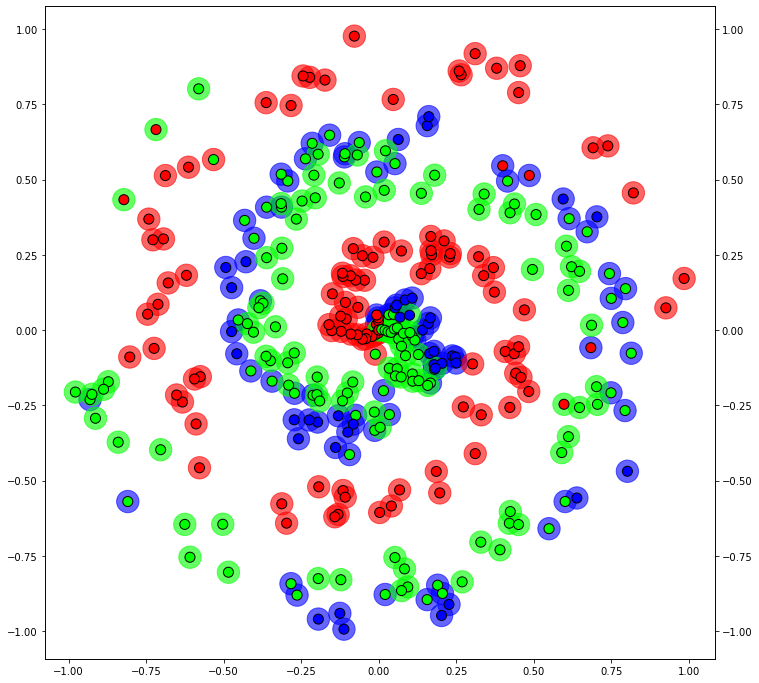

In [68]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

# Realni primer - uporaba Keras in Tensorflow knjižnjic

## Load data

In [72]:
columns = [
    "Number of times pregnant",
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skin fold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)",
    "Diabetes pedigree function",
    "Age (years)",
    "Class variable"
]
data = pd.read_csv("data/pima-indians-diabetes.data.csv", names=columns)
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data preprocessing

## Data scaling

## Creating Neural Network Model


## Training

## Evaluating the model

## Making predictions

# Save model


# Image Recognition and Classification

## Feature Extraction

### Convolutional Neural Network (CNN)

![CNN layer](images/conv-full-layer.gif)

![pooling layer](images/pooling_layer.png)

# Image classification - CIFRA-10 example

![CIFAR-10](images/cifar_10_dataset.png)

In [86]:
seed = 21

---

---

## Model Creation

---

Še enkrat vse skupaj v eni celici:

In [102]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

---

## Traning the model

Training history
![Train history](images/cnn_train_history.webp)

# Recurrent Neural Network

![RNN](images/rnn.png)

![anatomy_of_lstm](images/anatomy_of_lstm.png)

## Problem Formulation

## Data Preparation

[GitHub repo](https://github.com/formcept/whiteboard/tree/master/nbviewer/notebooks/data/harrypotter)

## Features and Labels

## Building RNN

## Training the model

## Text generation

# GPT-2 and GPT-J Text Generation

<table style="border-collapse: collapse; width: 55.8987%; height: 107px; margin-left: auto; margin-right: auto;" border="1">
<tbody>
<tr style="height: 18px;">
<td style="width: 39.1738%; text-align: center; height: 18px;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">Model</span></td>
<td style="width: 30.6178%; height: 18px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">Number of Parameters</span></td>
<td style="width: 21.5188%; height: 18px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">Size</span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; height: 18px; text-align: center;"><strong><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">gpt2</span></code></span></strong></td>
<td style="width: 30.6178%; height: 18px; text-align: center;"><strong><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">124M</span></strong></td>
<td style="width: 21.5188%; height: 18px; text-align: center;"><span style="font-family: 'andale mono', monospace;"><strong><span style="font-size: 12pt;">523MB</span></strong></span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; height: 18px; text-align: center;"><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-neo-125M</span></code></span></td>
<td style="width: 30.6178%; height: 18px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">125M</span></td>
<td style="width: 21.5188%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace; font-size: 12pt;">502MB</span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-neo-1.3B</span></code></span></td>
<td style="width: 30.6178%; text-align: center; height: 18px;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">1.3B</span></td>
<td style="width: 21.5188%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace; font-size: 12pt;">4.95GB</span></td>
</tr>
<tr style="height: 17px;">
<td style="width: 39.1738%; height: 17px; text-align: center;"><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-neo-2.7B</span></code></span></td>
<td style="width: 30.6178%; height: 17px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">2.7B</span></td>
<td style="width: 21.5188%; height: 17px; text-align: center;"><span style="font-family: 'andale mono', monospace; font-size: 12pt;">9.94GB</span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; text-align: center; height: 18px;"><strong><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-j-6B</span></code></span></strong></td>
<td style="width: 30.6178%; text-align: center; height: 18px;"><strong><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">6B</span></strong></td>
<td style="width: 21.5188%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace;"><strong><span style="font-size: 12pt;">22.5GB</span></strong></span></td>
</tr>
</tbody>
</table>

## Installing library

## Uporaba knjižnjice

https://6b.eleuther.ai/ - online prompt za GPT-J